In [1]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import graphviz

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report

In [3]:
import os
cwd = os.getcwd()
print(cwd)
os.chdir('/Users/arind/Statistics_Class') 

C:\Users\arind\Statistics_Class


In [4]:
#df3 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)
df2017 = pd.read_csv('SRER_2017_training_bi.csv').dropna()
df2017 = df2017.drop(df2017.columns[[0, 1, 2, 3, 4]], axis=1)

#df3.info()
df2017.shape

(4339, 14)

In [5]:
df2017['Height'] = df2017.CH_mean.map(lambda x: 1 if x>0.1 else 0)
df2017['NDVI_healthy'] = df2017.NDVI_mean.map(lambda x: 1 if 0.2>x>0.8 else 0)
df2017.Veg_class = df2017.Veg_class.map({'non-woody':0, 'woody':1})

df2017.head(5)

,CH_mean,ARVI_max,ARVI_mean,ARVI_med,EVI_max,EVI_mean,EVI_med,NDVI_max,NDVI_mean,NDVI_med,SAVI_max,SAVI_mean,SAVI_med,Veg_class,Height,NDVI_healthy
0,0.190714,0.609099,0.344183,0.379428,0.443455,0.292047,0.290985,0.665698,0.476709,0.507514,0.406991,0.286203,0.288351,1,1,0
1,0.045000,0.387755,0.245301,0.274936,0.332059,0.252919,0.244477,0.526375,0.406745,0.433791,0.328585,0.254814,0.248126,0,0,0
2,0.010000,0.038844,0.004040,0.026805,0.150550,0.131985,0.134891,0.208300,0.181575,0.205117,0.150184,0.131642,0.135063,0,0,0
3,0.011667,0.189842,0.033418,0.018961,0.198972,0.141579,0.138338,0.341480,0.207390,0.197327,0.197330,0.141500,0.138725,0,0,0
4,0.013750,0.322694,0.080315,0.061453,0.248442,0.158710,0.142326,0.457103,0.247391,0.228112,0.248598,0.158618,0.142817,0,0,0


In [6]:
X = df2017.drop(['CH_mean', 'Veg_class'], axis = 1)
y = df2017.Veg_class

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [7]:
classification_tree_2017data = DecisionTreeClassifier(max_depth = 6)
clf = classification_tree_2017data.fit(X_train, y_train)
classification_tree_2017data.score(X_train, y_train)

0.7288965715932008

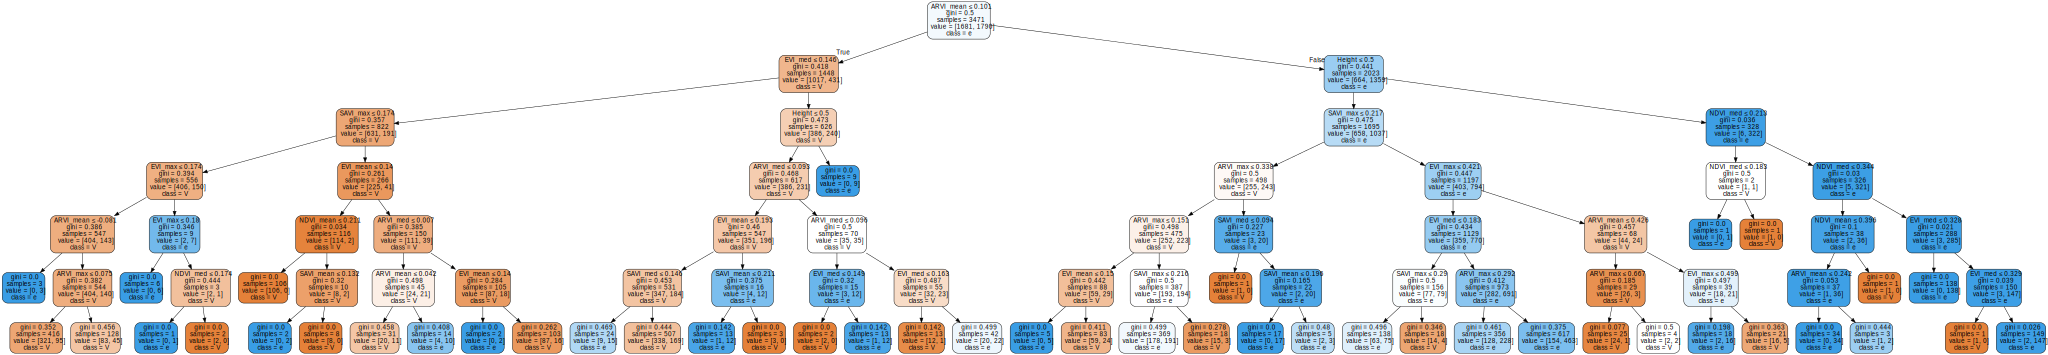

In [8]:
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns, 
                     class_names=y_train.name,
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

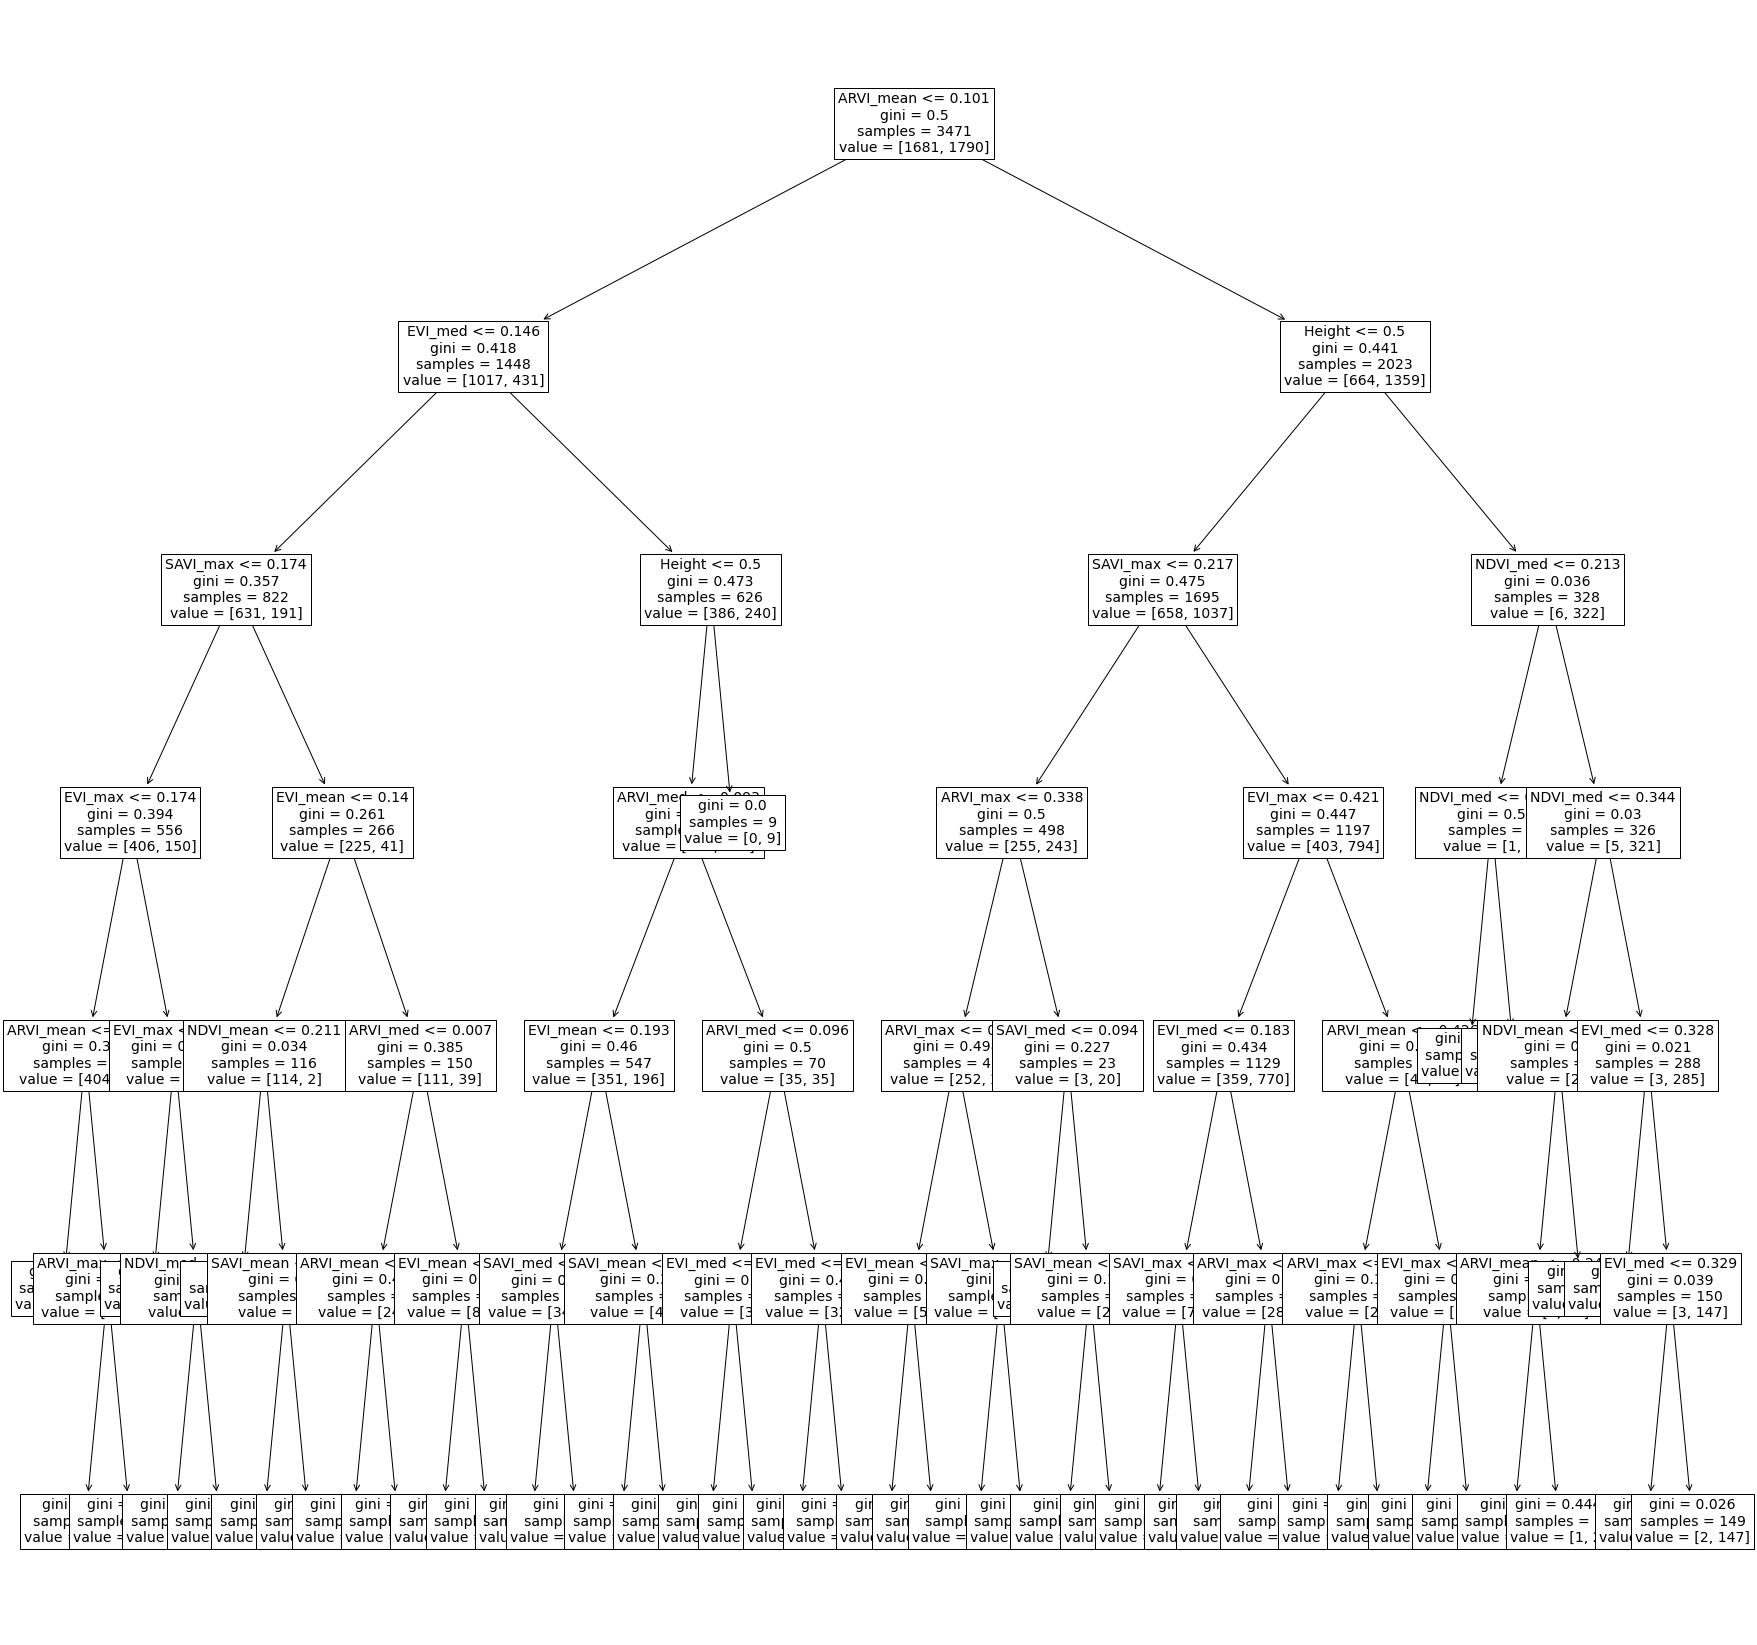

In [9]:
from sklearn import tree
plt.figure(figsize=(30,30))

tree.plot_tree(classification_tree_2017data, fontsize = 14, feature_names = X_train.columns)
plt.show()

In [10]:
pred = classification_tree_2017data.predict(X_test)

In [11]:
confusion_matrix(y_test, pred)

array([[247, 160],
       [123, 338]], dtype=int64)

In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       407
           1       0.68      0.73      0.70       461

    accuracy                           0.67       868
   macro avg       0.67      0.67      0.67       868
weighted avg       0.67      0.67      0.67       868



In [13]:
#Fittng Regression Trees

X = df2017.drop('Veg_class', axis = 1)
y = df2017.Veg_class
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# Pruning not supported. Choosing max depth 2)
regr_tree_2017data = DecisionTreeRegressor(max_depth = 2)
regr_tree_2017data.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(167.4, 181.2, 'ARVI_mean <= 0.101\nmse = 0.25\nsamples = 3471\nvalue = 0.516'),
 Text(83.7, 108.72, 'EVI_med <= 0.146\nmse = 0.209\nsamples = 1448\nvalue = 0.298'),
 Text(41.85, 36.23999999999998, 'mse = 0.178\nsamples = 822\nvalue = 0.232'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.236\nsamples = 626\nvalue = 0.383'),
 Text(251.10000000000002, 108.72, 'CH_mean <= 0.094\nmse = 0.22\nsamples = 2023\nvalue = 0.672'),
 Text(209.25, 36.23999999999998, 'mse = 0.238\nsamples = 1683\nvalue = 0.61'),
 Text(292.95, 36.23999999999998, 'mse = 0.023\nsamples = 340\nvalue = 0.976')]

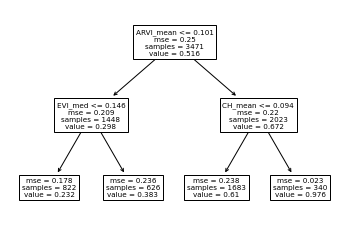

In [14]:
from sklearn import tree
tree.plot_tree(regr_tree_2017data, feature_names = X_train.columns)

0.21141485184950384

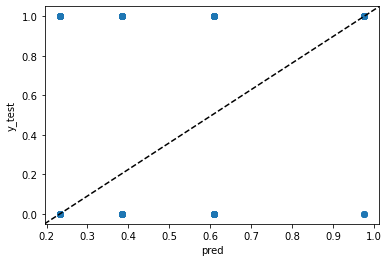

In [15]:
pred = regr_tree_2017data.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'Veg_class')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

In [16]:
# Bagging: using all features
bagged_2017Data = RandomForestClassifier(max_features = 13, random_state = 1)
bagged_2017Data.fit(X_train, y_train)

RandomForestClassifier(max_features=13, random_state=1)

0.33986175115207373

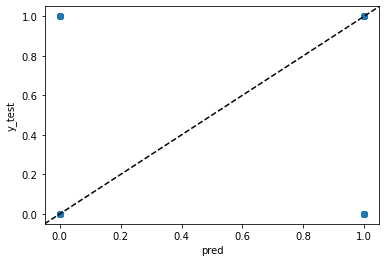

In [17]:
pred = bagged_2017Data.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'Veg_class')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

In [18]:
random_forest_boston = RandomForestClassifier(max_features = 6, random_state = 1)

random_forest_boston.fit(X_train, y_train)

pred = random_forest_boston.predict(X_test)
mean_squared_error(y_test, pred)

0.33640552995391704

In [19]:
#Boosting Models
boosted_boston = GradientBoostingClassifier(n_estimators = 500, 
                                           learning_rate = 0.01, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_boston.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=500,
                           random_state=1)